In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c440ecee2b198d4e3be40495fa2cf3d6e26e23e2fee670f091a7d82dc9745d41
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/balanced/em_2.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/imbalanced/em_2.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/balanced/em_2.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/imbalanced/em_2.csv'



In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

#Balanced Dataset

#UNI - Directional

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2060272693634033. Accuracy: 44.18848% F1-macro: 40.26% F1-weighted: 40.43% cohen_kappa: 0.25%
Iteration: 2000. Loss: 1.122329592704773. Accuracy: 47.17277% F1-macro: 43.25% F1-weighted: 43.34% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.079772710800171. Accuracy: 49.00524% F1-macro: 49.15% F1-weighted: 49.16% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.5280354022979736. Accuracy: 51.57068% F1-macro: 51.17% F1-weighted: 51.24% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.3068877458572388. Accuracy: 53.61257% F1-macro: 53.40% F1-weighted: 53.46% cohen_kappa: 0.38%
Iteration: 6000. Loss: 1.4442797899246216. Accuracy: 52.35602% F1-macro: 51.96% F1-weighted: 52.06% cohen_kappa: 0.36%
Iteration: 7000. Loss: 0.9196245074272156. Accuracy: 54.45026% F1-macro: 54.03% F1-weighted: 54.11% cohen_kappa: 0.39%
Iteration: 8000. Loss: 1.0607707500457764. Accuracy: 53.08901% F1-macro: 53.00% F1-weighted: 53.06% cohen_kappa: 0.37%
Iteration: 9000. Loss: 1

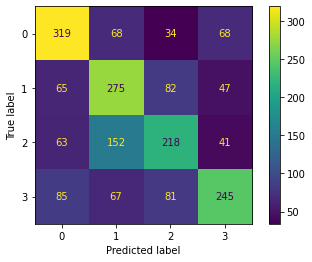

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            y_pred = []
            y_true = []

            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()


NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2997698783874512. Accuracy: 46.17801% F1-macro: 44.47% F1-weighted: 44.58% cohen_kappa: 0.28%
Iteration: 2000. Loss: 1.2257747650146484. Accuracy: 50.20942% F1-macro: 50.32% F1-weighted: 50.38% cohen_kappa: 0.34%
Iteration: 3000. Loss: 1.229525089263916. Accuracy: 52.40838% F1-macro: 51.96% F1-weighted: 52.00% cohen_kappa: 0.37%
Iteration: 4000. Loss: 1.2624233961105347. Accuracy: 52.77487% F1-macro: 52.35% F1-weighted: 52.40% cohen_kappa: 0.37%
Iteration: 5000. Loss: 1.174127459526062. Accuracy: 52.67016% F1-macro: 51.53% F1-weighted: 51.64% cohen_kappa: 0.37%
Iteration: 6000. Loss: 1.208106279373169. Accuracy: 55.75916% F1-macro: 55.94% F1-weighted: 55.98% cohen_kappa: 0.41%
Iteration: 7000. Loss: 1.4147075414657593. Accuracy: 54.24084% F1-macro: 53.56% F1-weighted: 53.61% cohen_kappa: 0.39%
Iteration: 8000. Loss: 1.1204088926315308. Accuracy: 52.87958% F1-macro: 53.25% F1-weighted: 53.31% cohen_kappa: 0.37%
Iteration: 9000. Loss: 0.

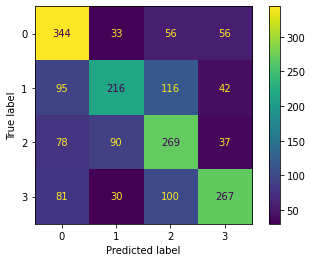

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.3627510070800781. Accuracy: 46.91099% F1-macro: 45.93% F1-weighted: 46.04% cohen_kappa: 0.29%
Iteration: 2000. Loss: 1.2524632215499878. Accuracy: 46.59686% F1-macro: 45.40% F1-weighted: 45.48% cohen_kappa: 0.29%
Iteration: 3000. Loss: 1.1179996728897095. Accuracy: 51.25654% F1-macro: 50.30% F1-weighted: 50.39% cohen_kappa: 0.35%
Iteration: 4000. Loss: 1.4754756689071655. Accuracy: 51.15183% F1-macro: 50.36% F1-weighted: 50.32% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.0783220529556274. Accuracy: 54.71204% F1-macro: 54.60% F1-weighted: 54.66% cohen_kappa: 0.40%
Iteration: 6000. Loss: 1.0485622882843018. Accuracy: 55.18325% F1-macro: 55.25% F1-weighted: 55.27% cohen_kappa: 0.40%
Iteration: 7000. Loss: 0.9754382371902466. Accuracy: 56.12565% F1-macro: 55.89% F1-weighted: 55.95% cohen_kappa: 0.41%
Iteration: 8000. Loss: 0.9958263635635376. Accuracy: 54.76440% F1-macro: 54.65% F1-weighted: 54.70% cohen_kappa: 0.40%
Iteration: 9000. Loss:

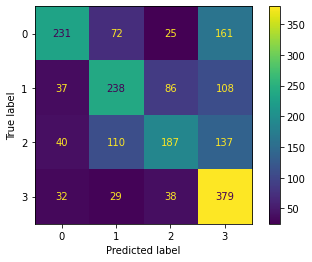

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)


      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'RAdam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2830073833465576. Accuracy: 47.80105% F1-macro: 46.53% F1-weighted: 46.67% cohen_kappa: 0.30%
Iteration: 2000. Loss: 1.0107543468475342. Accuracy: 51.15183% F1-macro: 49.75% F1-weighted: 49.87% cohen_kappa: 0.35%
Iteration: 3000. Loss: 1.3618671894073486. Accuracy: 47.90576% F1-macro: 46.56% F1-weighted: 46.54% cohen_kappa: 0.31%
Iteration: 4000. Loss: 1.079132318496704. Accuracy: 53.29843% F1-macro: 53.01% F1-weighted: 53.08% cohen_kappa: 0.38%
Iteration: 5000. Loss: 0.9678633809089661. Accuracy: 54.50262% F1-macro: 54.40% F1-weighted: 54.44% cohen_kappa: 0.39%
Iteration: 6000. Loss: 1.1303035020828247. Accuracy: 54.45026% F1-macro: 53.80% F1-weighted: 53.82% cohen_kappa: 0.39%
Iteration: 7000. Loss: 0.9695493578910828. Accuracy: 56.54450% F1-macro: 56.24% F1-weighted: 56.30% cohen_kappa: 0.42%
Iteration: 8000. Loss: 1.0485243797302246. Accuracy: 54.60733% F1-macro: 54.23% F1-weighted: 54.27% cohen_kappa: 0.40%
Iteration: 9000. Loss: 

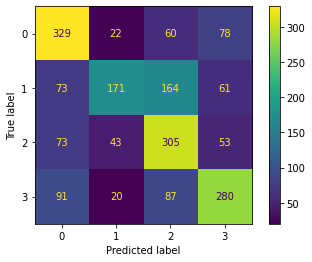

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)

class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional

      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)

  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.29458749294281. Accuracy: 45.75916% F1-macro: 43.39% F1-weighted: 43.53% cohen_kappa: 0.28%
Iteration: 2000. Loss: 1.1824647188186646. Accuracy: 49.73822% F1-macro: 49.53% F1-weighted: 49.60% cohen_kappa: 0.33%
Iteration: 3000. Loss: 1.2282817363739014. Accuracy: 52.61780% F1-macro: 52.12% F1-weighted: 52.20% cohen_kappa: 0.37%
Iteration: 4000. Loss: 1.2523305416107178. Accuracy: 51.98953% F1-macro: 51.68% F1-weighted: 51.68% cohen_kappa: 0.36%
Iteration: 5000. Loss: 1.0958366394042969. Accuracy: 54.71204% F1-macro: 54.06% F1-weighted: 54.15% cohen_kappa: 0.40%
Iteration: 6000. Loss: 1.0293642282485962. Accuracy: 53.82199% F1-macro: 53.56% F1-weighted: 53.62% cohen_kappa: 0.38%
Iteration: 7000. Loss: 1.290837049484253. Accuracy: 52.82723% F1-macro: 52.12% F1-weighted: 52.16% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.3471397161483765. Accuracy: 55.75916% F1-macro: 55.79% F1-weighted: 55.83% cohen_kappa: 0.41%
Iteration: 9000. Loss: 1.

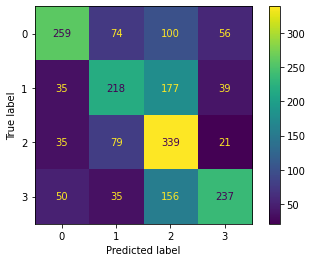

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2897772789001465. Accuracy: 42.98429% F1-macro: 39.93% F1-weighted: 40.05% cohen_kappa: 0.24%
Iteration: 2000. Loss: 1.0601717233657837. Accuracy: 47.80105% F1-macro: 47.35% F1-weighted: 47.43% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.026107668876648. Accuracy: 50.57592% F1-macro: 48.56% F1-weighted: 48.63% cohen_kappa: 0.34%
Iteration: 4000. Loss: 1.0727651119232178. Accuracy: 51.15183% F1-macro: 51.21% F1-weighted: 51.27% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.2538461685180664. Accuracy: 52.98429% F1-macro: 52.70% F1-weighted: 52.79% cohen_kappa: 0.37%
Iteration: 6000. Loss: 1.161902904510498. Accuracy: 55.44503% F1-macro: 55.38% F1-weighted: 55.45% cohen_kappa: 0.41%
Iteration: 7000. Loss: 1.0713276863098145. Accuracy: 52.19895% F1-macro: 48.95% F1-weighted: 49.12% cohen_kappa: 0.36%
Iteration: 8000. Loss: 1.146457314491272. Accuracy: 55.81152% F1-macro: 55.22% F1-weighted: 55.30% cohen_kappa: 0.41%
Iteration: 9000. Loss: 0.

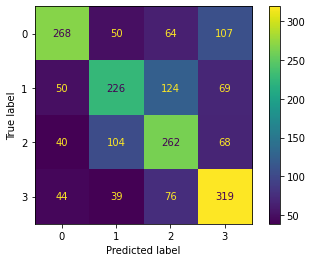

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2581260204315186. Accuracy: 51.81818% F1-macro: 26.04% F1-weighted: 39.59% cohen_kappa: 0.15%
Iteration: 2000. Loss: 1.2261121273040771. Accuracy: 52.82132% F1-macro: 38.13% F1-weighted: 49.32% cohen_kappa: 0.29%
Iteration: 3000. Loss: 0.9158384203910828. Accuracy: 57.96238% F1-macro: 41.87% F1-weighted: 52.84% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.315358281135559. Accuracy: 57.64890% F1-macro: 43.94% F1-weighted: 53.76% cohen_kappa: 0.34%
Iteration: 5000. Loss: 0.9070768356323242. Accuracy: 59.43574% F1-macro: 43.03% F1-weighted: 53.61% cohen_kappa: 0.32%
Iteration: 6000. Loss: 1.066236972808838. Accuracy: 60.97179% F1-macro: 47.97% F1-weighted: 57.21% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.0950876474380493. Accuracy: 61.22257% F1-macro: 50.70% F1-weighted: 59.05% cohen_kappa: 0.39%
Iteration: 8000. Loss: 0.9784542322158813. Accuracy: 62.28840% F1-macro: 49.91% F1-weighted: 58.66% cohen_kappa: 0.39%
Uncertainity: 0.9944142

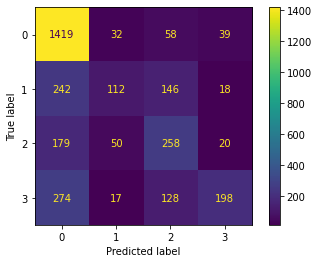

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.043663740158081. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.3574974536895752. Accuracy: 53.44828% F1-macro: 30.24% F1-weighted: 43.00% cohen_kappa: 0.18%
Iteration: 3000. Loss: 1.255212426185608. Accuracy: 54.79624% F1-macro: 40.19% F1-weighted: 50.59% cohen_kappa: 0.31%
Iteration: 4000. Loss: 1.243070363998413. Accuracy: 58.18182% F1-macro: 41.45% F1-weighted: 52.50% cohen_kappa: 0.33%
Iteration: 5000. Loss: 1.0656719207763672. Accuracy: 58.52665% F1-macro: 43.91% F1-weighted: 53.95% cohen_kappa: 0.32%
Iteration: 6000. Loss: 1.050584316253662. Accuracy: 59.18495% F1-macro: 41.38% F1-weighted: 52.93% cohen_kappa: 0.34%
Iteration: 7000. Loss: 1.163487434387207. Accuracy: 60.87774% F1-macro: 47.97% F1-weighted: 57.58% cohen_kappa: 0.39%
Iteration: 8000. Loss: 1.233349323272705. Accuracy: 59.02821% F1-macro: 41.45% F1-weighted: 52.64% cohen_kappa: 0.33%
Uncertainity: 0.8546078


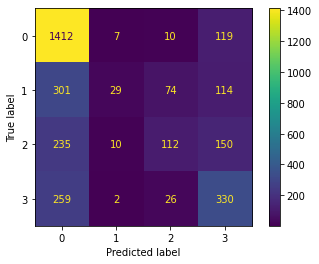

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2258480787277222. Accuracy: 51.37931% F1-macro: 23.16% F1-weighted: 38.23% cohen_kappa: 0.11%
Iteration: 2000. Loss: 1.140529751777649. Accuracy: 57.05329% F1-macro: 42.76% F1-weighted: 53.04% cohen_kappa: 0.32%
Iteration: 3000. Loss: 1.0386353731155396. Accuracy: 57.71160% F1-macro: 38.20% F1-weighted: 50.40% cohen_kappa: 0.29%
Iteration: 4000. Loss: 1.0673329830169678. Accuracy: 59.02821% F1-macro: 46.15% F1-weighted: 56.05% cohen_kappa: 0.36%
Iteration: 5000. Loss: 1.018208384513855. Accuracy: 57.96238% F1-macro: 39.35% F1-weighted: 50.70% cohen_kappa: 0.28%
Iteration: 6000. Loss: 1.2330631017684937. Accuracy: 58.08777% F1-macro: 40.48% F1-weighted: 51.35% cohen_kappa: 0.28%
Iteration: 7000. Loss: 0.9661270976066589. Accuracy: 60.31348% F1-macro: 49.46% F1-weighted: 58.09% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.1929999589920044. Accuracy: 61.66144% F1-macro: 49.02% F1-weighted: 57.80% cohen_kappa: 0.37%
Uncertainity: 0.9515983

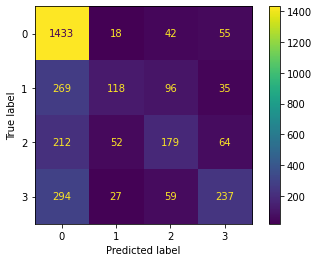

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.3436692953109741. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.2435535192489624. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 3000. Loss: 1.143669843673706. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 4000. Loss: 1.143668532371521. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 5000. Loss: 1.3436683416366577. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 6000. Loss: 1.3436659574508667. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 7000. Loss: 1.2436673641204834. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 8000. Loss: 1.043668508529663. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Uncertainity: 3.1137981e

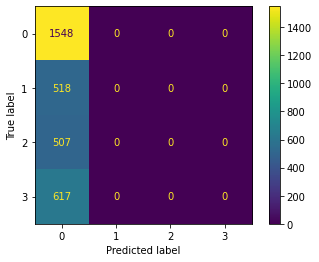

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2145687341690063. Accuracy: 52.72727% F1-macro: 30.79% F1-weighted: 43.50% cohen_kappa: 0.22%
Iteration: 2000. Loss: 1.24344003200531. Accuracy: 57.05329% F1-macro: 41.40% F1-weighted: 51.93% cohen_kappa: 0.29%
Iteration: 3000. Loss: 1.144012212753296. Accuracy: 57.86834% F1-macro: 40.57% F1-weighted: 51.39% cohen_kappa: 0.29%
Iteration: 4000. Loss: 1.138934850692749. Accuracy: 59.84326% F1-macro: 48.48% F1-weighted: 57.35% cohen_kappa: 0.37%
Iteration: 5000. Loss: 1.0268986225128174. Accuracy: 59.59248% F1-macro: 47.54% F1-weighted: 56.72% cohen_kappa: 0.36%
Iteration: 6000. Loss: 1.1039669513702393. Accuracy: 61.06583% F1-macro: 49.37% F1-weighted: 57.89% cohen_kappa: 0.37%
Iteration: 7000. Loss: 0.9906131625175476. Accuracy: 61.63009% F1-macro: 48.75% F1-weighted: 57.52% cohen_kappa: 0.37%
Iteration: 8000. Loss: 0.9148432612419128. Accuracy: 62.57053% F1-macro: 50.28% F1-weighted: 58.76% cohen_kappa: 0.39%
Uncertainity: 0.9585426


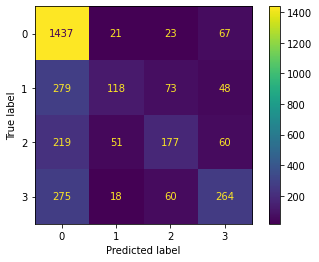

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.9732837677001953. Accuracy: 52.50784% F1-macro: 25.90% F1-weighted: 39.30% cohen_kappa: 0.14%
Iteration: 2000. Loss: 1.2456833124160767. Accuracy: 56.01881% F1-macro: 37.44% F1-weighted: 49.26% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.178999900817871. Accuracy: 59.34169% F1-macro: 42.95% F1-weighted: 53.74% cohen_kappa: 0.34%
Iteration: 4000. Loss: 1.0059552192687988. Accuracy: 59.78056% F1-macro: 42.45% F1-weighted: 53.71% cohen_kappa: 0.36%
Iteration: 5000. Loss: 0.9943881034851074. Accuracy: 59.12226% F1-macro: 42.60% F1-weighted: 53.60% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.2659095525741577. Accuracy: 60.94044% F1-macro: 47.08% F1-weighted: 56.35% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.0890278816223145. Accuracy: 61.15987% F1-macro: 48.48% F1-weighted: 57.44% cohen_kappa: 0.37%
Iteration: 8000. Loss: 0.9326310157775879. Accuracy: 61.81818% F1-macro: 51.12% F1-weighted: 59.09% cohen_kappa: 0.39%
Uncertainity: 1.040465

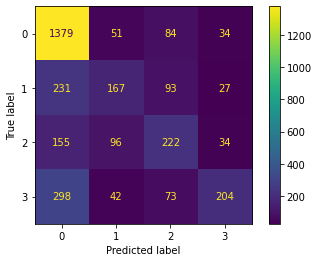

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'RAdam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

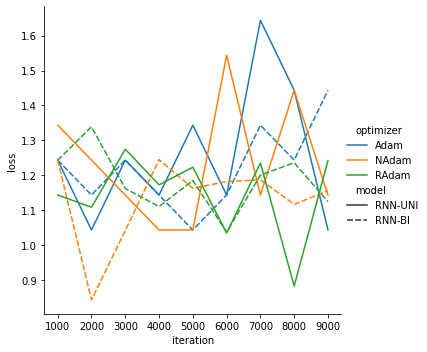

In [ ]:
# loss function plot for balanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

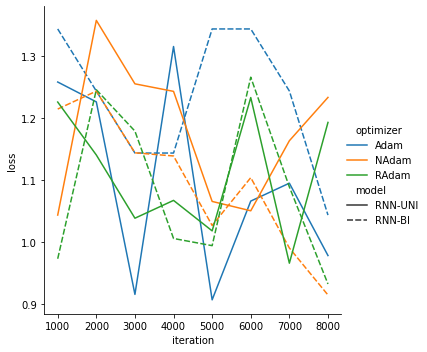

In [ ]:
# loss function plot for imbalanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 07:13:47.526733
